In [1]:
import tensorflow as tf;
import matplotlib.pyplot as plt;
import numpy as np;
import os;

2023-04-11 17:21:14.472894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 17:21:14.533335: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-11 17:21:14.881492: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.2/lib64:/usr/local/cuda-11.2/extras/CUPTI/lib64
2023-04-11 17:21:14.881542: W 

In [6]:
image_size=(28,28);

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join("nums"),
    #随机取验证的数据
    validation_split=0.2,
    subset="both",
    seed=666,
    color_mode='grayscale',
    crop_to_aspect_ratio= False,
    image_size=image_size,
)

def remake_image(img, label):
    fixedImage = (img/(255/2.0));
    return (fixedImage, label);

train_ds = train_ds.map(map_func=remake_image, num_parallel_calls= tf.data.AUTOTUNE);
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(map_func=remake_image, num_parallel_calls= tf.data.AUTOTUNE);
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

Found 332 files belonging to 10 classes.
Using 266 files for training.
Using 66 files for validation.


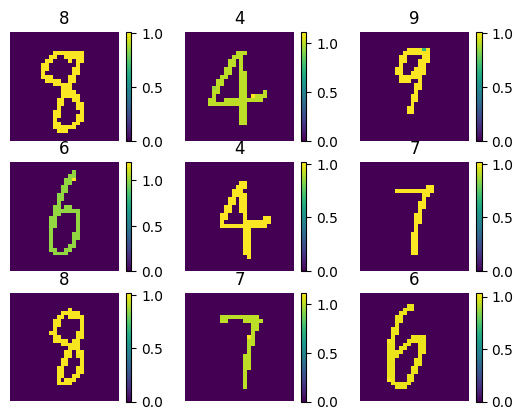

In [7]:
plt.figure(figsize=(6.4, 4.8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        #显示图片
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.colorbar()
        #不显示坐标
        plt.axis("off")

In [8]:
resultFilePath = 'number_check.h5';

model = tf.keras.models.load_model(resultFilePath);

model.summary();

#继续深入学习
model.fit(
    x = train_ds, 
    callbacks=tf.keras.callbacks.ModelCheckpoint('number_check.h5', save_best_only=True),
    validation_data=val_ds,
    epochs=30,
)

model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==============================] - 0s 9ms/step - loss: 1.1105 - accuracy: 0.6729 - val_loss: 1.0107 - val_accuracy: 0.6061
Epoch 2/30
9/9 [============================

In [9]:
mnist = tf.keras.datasets.mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

results = model.evaluate(x_test,  y_test, verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

313/313 - 0s - loss: 42.0852 - accuracy: 0.9293 - 152ms/epoch - 485us/step
loss: 42.085
accuracy: 0.929
